In [1]:
from numpy import *
from plot_service import *

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
train_file = 'datasets/train.csv'

X = loadtxt(train_file, usecols=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), unpack=True, delimiter=',').T
Y = loadtxt(train_file, unpack=True, usecols=(11), delimiter=',')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

print('Data loaded!')

Data loaded!


In [3]:
model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)
score = model.score(X_val, y_val)

pred = preds.reshape(len(preds))
real = y_test

In [4]:
plot_table(real, pred)

|     Real |     Predict |
|----------+-------------|
| 0.280669 |  0.257037   |
| 0.077872 |  0.11233    |
| 0.104906 |  0.136188   |
| 0.275276 |  0.251268   |
| 0.485488 |  0.407924   |
| 0.114552 |  0.155789   |
| 0.07531  |  0.0752791  |
| 0.034378 |  0.00951002 |
| 0.025761 |  0.00577409 |
| 0.138474 |  0.172015   |
| 0.09235  |  0.0703181  |
| 0.103453 |  0.141201   |
| 0.055177 |  0.079855   |
| 0.054338 |  0.107355   |
| 0.124842 |  0.101571   |
| 0.706    |  0.426587   |
| 0.253669 |  0.20743    |
| 0.085852 |  0.121455   |
| 0.132435 |  0.163669   |
| 0.148348 |  0.169994   |
| 0.173093 |  0.18484    |
| 0.089478 |  0.117722   |
| 0.390088 |  0.352107   |
| 0.160668 |  0.135451   |
| 0.211254 |  0.168547   |
| 0.157654 |  0.151275   |
| 0.159079 |  0.157819   |
| 0.109328 |  0.137535   |
| 0.13916  |  0.103724   |
| 0.071529 |  0.0979175  |
| 0.128429 |  0.162168   |
| 0.331388 |  0.308121   |
| 0.394787 |  0.346571   |
| 0.187083 |  0.130548   |
| 0.092121 |  0.0662955  |
|

In [5]:
plot_table_cf('Coeficientes', model.coef_)

|   Coeficientes |
|----------------|
|    -0.00946062 |
|     0.116989   |
|     0.0602571  |
|    -0.0732814  |
|    -0.0536238  |
|     0.02994    |
|    -0.020573   |
|     0.753262   |
|     0.018501   |
|     0.00986858 |


In [6]:
print("Score: ", score)
print("Mean squared error: %.2f" % mean_squared_error(real, pred))
print('Variance score: %.2f' % r2_score(real, pred))

Score:  0.823328539053
Mean squared error: 0.00
Variance score: 0.82


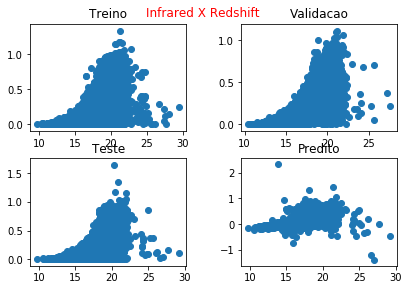

In [7]:
 plot_scatter(X_train, y_train, X_val, y_val, X_test, y_test, preds, show_only=True)

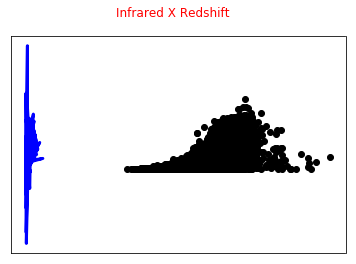

In [8]:
plot_scatter_lr(X_train, y_train, real, pred, show_only=True)

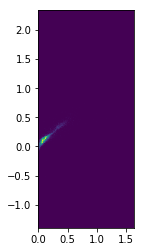

In [9]:
plot_hm(real, pred, show_only=True)